# Preprocess / Create vacabulary

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


[Imdb dataset](http://ai.stanford.edu/~amaas/data/sentiment/) from Stanford will be used below. 

In [3]:
import tensorflow_datasets as tfds

# Using imdb dataset from stanford University
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [63]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy().decode('utf8')))
  training_labels.append(l.numpy())

  testing_sentences.append(str(s.numpy().decode('utf8')))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)



In [64]:
training_labels_final.shape
testing_labels_final.shape

(25000,)

In [65]:
print("number of training sentences: ", len(training_sentences))
print("number of testing sentences: ", len(testing_sentences))

number of training sentences:  25000
number of testing sentences:  25000


In [66]:
# One training examples
training_sentences[5]

"This is a film which should be seen by anybody interested in, effected by, or suffering from an eating disorder. It is an amazingly accurate and sensitive portrayal of bulimia in a teenage girl, its causes and its symptoms. The girl is played by one of the most brilliant young actresses working in cinema today, Alison Lohman, who was later so spectacular in 'Where the Truth Lies'. I would recommend that this film be shown in all schools, as you will never see a better on this subject. Alison Lohman is absolutely outstanding, and one marvels at her ability to convey the anguish of a girl suffering from this compulsive disorder. If barometers tell us the air pressure, Alison Lohman tells us the emotional pressure with the same degree of accuracy. Her emotional range is so precise, each scene could be measured microscopically for its gradations of trauma, on a scale of rising hysteria and desperation which reaches unbearable intensity. Mare Winningham is the perfect choice to play her mo

## Create Token based on training set and sequences for both training and testing set

In [67]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# create a token generator
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizering on the training set
tokenizer.fit_on_texts(training_sentences)
# Get the dictionary of the vacabulary
word_index = tokenizer.word_index

In [68]:
# Create sequences for the training set based on tokenizer
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [69]:
# Create sequences for testing set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [70]:
# see one example
print(sequences[5])

[12, 7, 4, 20, 61, 142, 28, 108, 32, 1813, 925, 9, 1, 32, 40, 2071, 37, 33, 1884, 5845, 10, 7, 33, 2782, 1854, 3, 2719, 1142, 5, 1, 9, 4, 1665, 248, 92, 2905, 3, 92, 1, 2, 248, 7, 254, 32, 29, 5, 2, 89, 527, 183, 1505, 778, 9, 435, 636, 5400, 1, 35, 14, 301, 36, 2087, 9, 1, 2, 880, 1, 11, 60, 384, 13, 12, 20, 28, 615, 9, 30, 5846, 15, 23, 78, 113, 65, 4, 126, 21, 12, 873, 5400, 1, 7, 425, 1336, 3, 29, 1, 31, 39, 1251, 6, 2824, 2, 8423, 5, 4, 248, 2071, 37, 12, 1, 5845, 45, 1, 374, 176, 2, 943, 5075, 5400, 1, 714, 176, 2, 917, 5075, 17, 2, 170, 2456, 5, 5035, 39, 917, 2197, 7, 36, 7264, 255, 134, 98, 28, 1, 1, 16, 92, 1, 5, 7365, 21, 4, 2402, 5, 4678, 1, 3, 4175, 61, 4202, 3790, 3023, 1, 1, 7, 2, 402, 1096, 6, 295, 39, 450, 3, 125, 36, 17, 6629, 2503, 3, 4, 2197, 5, 1434, 41, 15, 8597, 6793, 15, 1, 293, 34, 95, 4, 2156, 5, 2719, 917, 1, 1, 9, 1, 17, 29, 158, 12, 20, 7, 64, 33, 5121, 3586, 3, 165, 1, 1, 142, 28, 2603, 5, 10, 2, 62, 280, 16, 22, 317, 10, 7, 45, 23, 24, 22, 925, 9, 82, 19,

In [71]:
print(word_index) # (word: index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'most':

In [73]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [74]:
print(revers_word_index) # (index: word)

{1: '<OOV>', 2: 'the', 3: 'and', 4: 'a', 5: 'of', 6: 'to', 7: 'is', 8: 'br', 9: 'in', 10: 'it', 11: 'i', 12: 'this', 13: 'that', 14: 'was', 15: 'as', 16: 'for', 17: 'with', 18: 'movie', 19: 'but', 20: 'film', 21: "'s", 22: 'on', 23: 'you', 24: 'not', 25: 'are', 26: 'his', 27: 'he', 28: 'have', 29: 'be', 30: 'one', 31: 'all', 32: 'at', 33: 'by', 34: 'they', 35: 'an', 36: 'who', 37: 'so', 38: 'from', 39: 'like', 40: 'her', 41: "'t", 42: 'or', 43: 'just', 44: 'there', 45: 'about', 46: 'out', 47: "'", 48: 'has', 49: 'if', 50: 'some', 51: 'what', 52: 'good', 53: 'more', 54: 'very', 55: 'when', 56: 'she', 57: 'up', 58: 'can', 59: 'b', 60: 'time', 61: 'no', 62: 'even', 63: 'my', 64: 'would', 65: 'which', 66: 'story', 67: 'only', 68: 'really', 69: 'see', 70: 'their', 71: 'had', 72: 'were', 73: 'me', 74: 'well', 75: 'we', 76: 'than', 77: 'much', 78: 'been', 79: 'get', 80: 'bad', 81: 'will', 82: 'people', 83: 'do', 84: 'also', 85: 'other', 86: 'into', 87: 'because', 88: 'great', 89: 'first', 90:

In [75]:
def decode_text(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [76]:
print(decode_text(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [77]:
# tokenizer.sequences_to_texts(padded[3:4])

# Create Model

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [80]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4949 - accuracy: 0.7424 - val_loss: 0.2958 - val_accuracy: 0.8789
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2465 - accuracy: 0.9025 - val_loss: 0.2745 - val_accuracy: 0.8876
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1097 - accuracy: 0.9681 - val_loss: 0.3000 - val_accuracy: 0.8859
Epoch 4/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0292 - accuracy: 0.9960 - val_loss: 0.3460 - val_accuracy: 0.8845
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.3829 - val_accuracy: 0.8855
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.4219 - val_accuracy: 0.8851
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4451 - val_accuracy: 0.8859
Epoch 

In [81]:
# get the weights of embedded layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


# Save vector and texts

In [82]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [85]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


# Using pre-tokenzied dataset

Using [SubwordTextEncoder](https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder)
imdb_reviews [subwords](https://github.com/tensorflow/datasets/blob/master/docs/catalog/imdb_reviews.md)

In [2]:
import tensorflow as tf
print(tf.__version__)


2.3.0


In [3]:
# download imdb dataset in the form of subwords8k
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSUMEAU/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSUMEAU/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSUMEAU/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [11]:
train_data, test_data = imdb['train'], imdb['test']
# get the pre-tokenzied
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [6]:
# simple example
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [7]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [13]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(), # the data through embedded layer is already flattened 1D
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 5

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 15s 38ms/step - loss: 0.6803 - accuracy: 0.6175 - val_loss: 0.6399 - val_accuracy: 0.7444
Epoch 2/5
391/391 [==============================] - 14s 36ms/step - loss: 0.5434 - accuracy: 0.7839 - val_loss: 0.4672 - val_accuracy: 0.8291
Epoch 3/5
391/391 [==============================] - 14s 37ms/step - loss: 0.3891 - accuracy: 0.8630 - val_loss: 0.3729 - val_accuracy: 0.8633
Epoch 4/5
391/391 [==============================] - 14s 36ms/step - loss: 0.3126 - accuracy: 0.8885 - val_loss: 0.3419 - val_accuracy: 0.8645
Epoch 5/5
391/391 [==============================] - 14s 36ms/step - loss: 0.2744 - accuracy: 0.9026 - val_loss: 0.3468 - val_accuracy: 0.8504


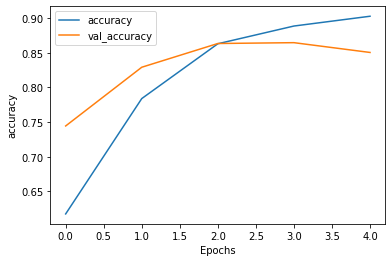

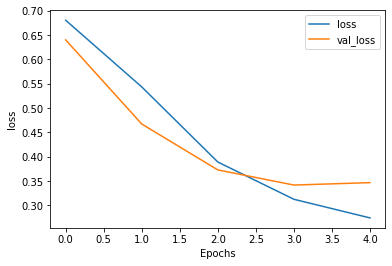

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")